In [11]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

Epoch 1/5
1688/1688 [==============================] - 38s 22ms/step - loss: 0.1433 - accuracy: 0.9557 - val_loss: 0.0507 - val_accuracy: 0.9842
Epoch 2/5
1688/1688 [==============================] - 36s 21ms/step - loss: 0.0486 - accuracy: 0.9853 - val_loss: 0.0388 - val_accuracy: 0.9885
Epoch 3/5
1688/1688 [==============================] - 39s 23ms/step - loss: 0.0321 - accuracy: 0.9896 - val_loss: 0.0342 - val_accuracy: 0.9918
Epoch 4/5
1688/1688 [==============================] - 37s 22ms/step - loss: 0.0246 - accuracy: 0.9921 - val_loss: 0.0370 - val_accuracy: 0.9908
Epoch 5/5
1688/1688 [==============================] - 38s 22ms/step - loss: 0.0174 - accuracy: 0.9946 - val_loss: 0.0383 - val_accuracy: 0.9907
Epoch 1/5
1688/1688 [==============================] - 39s 23ms/step - loss: 0.0137 - accuracy: 0.9954 - val_loss: 0.0357 - val_accuracy: 0.9922
Epoch 2/5
1688/1688 [==============================] - 38s 23ms/step - loss: 0.0123 - accuracy: 0.9956 - val_loss: 0.0469 - val_ac

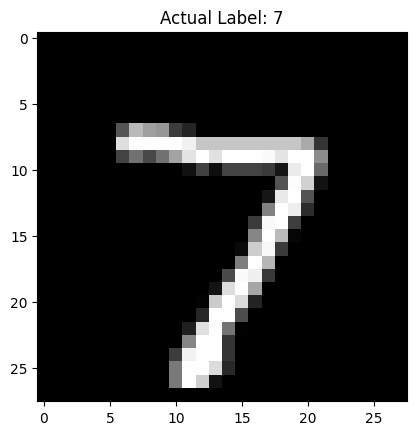

1/1 [==============================] - 0s 139ms/step
Predicted digit: 7


In [12]:

# Step 1: Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 2: Preprocess the data
x_train = x_train / 255.0  # Normalize to 0-1
x_test = x_test / 255.0

# Reshape for CNN input (batch_size, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Step 3: Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# After training the model
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Save the trained model to a file
model.save("digit_model.h5")
print("✅ Model saved as digit_model.h5")

# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_acc:.2f}")

# Step 7: Predict a sample digit
index = 0  # pick any digit from test set
plt.imshow(x_test[index].reshape(28,28), cmap='gray')
plt.title("Actual Label: {}".format(y_test[index]))
plt.show()

prediction = model.predict(np.expand_dims(x_test[index], axis=0))
print(f"Predicted digit: {np.argmax(prediction)}")
